# TP1 : PROBLEME TITANIC 

### Auteur : Achraf BOUMGHAIT CHERGUI

In [19]:
# importer les packages

import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
#Load train Data
train = pd.read_csv("data/train.csv", sep = ",")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
print(train.shape)

(891, 12)


In [22]:
#Remplir les valeurs manquantes

def fill_na(df):
    continuous_columns = df.select_dtypes(include=["number"])
    categorical_columns = df.select_dtypes(include=["object"])
    for x in continuous_columns : 
        df[x] = df[x].fillna(df[x].mean())
    for x in categorical_columns : 
        df[x] = df[x].fillna(df[x].mode())
    return df

In [23]:
train = fill_na(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

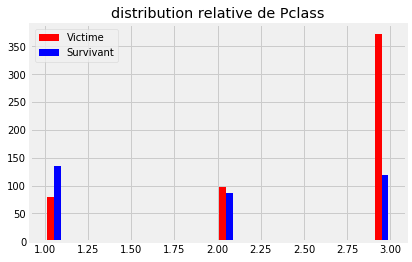

In [27]:
def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins, color=['r', 'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

on remarque de la plupart des victimes était dans Pclass = 3

In [32]:
# on va créer le DataFrame avec lequel on va travailler
df = train[['Pclass','Survived']]
df.head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [157]:
# Load test Data
test = pd.read_csv("data/test.csv", sep = ',')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [158]:
# Créer le dataframe et séparer la target

def parse_model(X, use_columns):
    if "Survived" not in X.columns:
        raise ValueError("target column survived should belong to df")
    target = X["Survived"]
    X = X[use_columns]
    return X, target

model_cols1 =['SibSp', 'Parch', 'Fare']
X, y = parse_model(X=train.copy(), use_columns=model_cols1)

#### Model avec 3 variables de prediction

In [159]:
lr = LogisticRegression()
list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
scores = []
for ts in list_test_size :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 0)
    clf = lr.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print(scores)

[0.7555555555555555, 0.6666666666666666, 0.6865671641791045, 0.6983240223463687, 0.6905829596412556, 0.7014925373134329, 0.6826923076923077, 0.6750700280112045, 0.6758104738154613, 0.6860986547085202, 0.6924643584521385, 0.6897196261682244, 0.6931034482758621, 0.6891025641025641, 0.6816143497757847, 0.6900420757363254, 0.6899736147757256, 0.6895261845386533, 0.6162927981109799]


In [160]:
# la moyenne des scores (Cross validation)

np.array(scores).mean() 

0.6868789152561124

In [161]:
# Transformer des variables catégorielles en binaire

def dummify_features(df):
    colnames = df.columns
    le_dict = {}
    for col in colnames:
        le_dict[col] = preprocessing.LabelEncoder()
        le_dict[col].fit(df[col])
        df.loc[:, col] = le_dict[col].transform(df[col])

    enc = preprocessing.OneHotEncoder()
    enc.fit(df)
    X = enc.transform(df)

    dummy_colnames = [cv + '_' + str(modality) for cv in colnames for modality in le_dict[cv].classes_]
    
    return X, dummy_colnames, enc


to_dummify = ["Pclass"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)


C:\Users\ACHRAF CHERGUI\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [162]:
X = pd.concat([X, X_dummy], axis = 1)
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,0.0,0.0,1.0
1,1,0,71.2833,1.0,0.0,0.0
2,0,0,7.9250,0.0,0.0,1.0
3,1,0,53.1000,1.0,0.0,0.0
4,0,0,8.0500,0.0,0.0,1.0


In [163]:
# on affiche les coéfficients des variables pour interpreter

lr.fit(X, y)
lr.coef_


array([[-0.150896  ,  0.23357229,  0.00669907,  0.3730938 ,  0.100852  ,
        -0.85258357]])

#### Model avec 4 variables de prediction

In [164]:
lr = LogisticRegression()
list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
scores = []
for ts in list_test_size :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 0)
    clf = lr.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

print(scores)

[0.8222222222222222, 0.7222222222222222, 0.7164179104477612, 0.7150837988826816, 0.7219730941704036, 0.7052238805970149, 0.6891025641025641, 0.680672268907563, 0.6882793017456359, 0.6771300448430493, 0.6883910386965377, 0.685981308411215, 0.6844827586206896, 0.6826923076923077, 0.6786248131539612, 0.697054698457223, 0.683377308707124, 0.7032418952618454, 0.525383707201889]


In [165]:
# Score
np.array(scores).mean()

0.6930293233865216

In [166]:
# on ajoute d'autres variables explicatives (Age et Sex)
X = pd.concat([X, train['Age']], axis = 1)
to_dummify = ["Sex"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)
X = pd.concat([X, X_dummy], axis = 1)
X.head()

C:\Users\ACHRAF CHERGUI\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Age,Sex_female,Sex_male
0,1,0,7.2500,0.0,0.0,1.0,22.0,0.0,1.0
1,1,0,71.2833,1.0,0.0,0.0,38.0,1.0,0.0
2,0,0,7.9250,0.0,0.0,1.0,26.0,1.0,0.0
3,1,0,53.1000,1.0,0.0,0.0,35.0,1.0,0.0
4,0,0,8.0500,0.0,0.0,1.0,35.0,0.0,1.0


In [167]:
lr = LogisticRegression()
list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
scores = []
X = fill_na(X)
for ts in list_test_size :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 0)
    clf = lr.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

scores

#score
np.array(scores).mean()

0.7855144064642534

Le score a diminué donc l'age en sa totalité n'améliore pas les performances de notre modéle

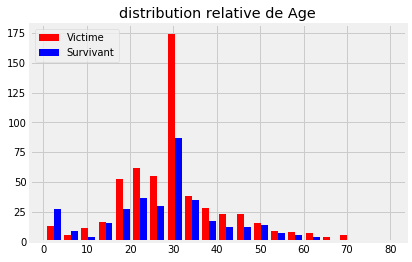

In [168]:
plot_hist('Age')

on peut voir du histogramme que la population ayant un nombre de survivant supérieur à celui des victimes est celle ayant moins de 8 ans

In [169]:
X['is_child'] = X['Age'] < 8
X = X.drop('Age', axis = 1)

In [170]:
list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
scores = []
for ts in list_test_size :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 0)
    clf = lr.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

scores
np.array(scores).mean()

0.7916038408266256

In [171]:
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand = False)
train['Title'] = train['Title'].replace(['Lady','Countess','Col','Capt','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
train['Title'] = train['Title'].replace('Mlle','Miss')
train['Title'] = train['Title'].replace('Ms','Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')
title_mapping = {"Mr":1, "Miss":2,"Mrs":3,"Master":4,"Rare":5}
train["Title"] = train['Title'].map(title_mapping)
X = pd.concat([X, train["Title"]], axis = 1)
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,is_child,Title
0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,False,1
1,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,False,3
2,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,False,2
3,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,False,3
4,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,False,1


####  Modele avec 7 variables de prédiction

In [172]:
list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
scores = []
for ts in list_test_size :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 0)
    clf = lr.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

scores
np.array(scores).mean()

0.7862130381876329

#### Random Forest

In [175]:
# on va variér les valeurs des parametres de random forest pour trouver le meilleur combinaison
resultat = []
for n in range(100,350,50):
    resultat1 = []
    for m in range(6,20,2):
        rf = RandomForestClassifier(n_estimators=n, max_depth = m )
        list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
        scores = []
        for ts in list_test_size :
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 0)
            clf = rf.fit(X_train, y_train)
            scores.append(clf.score(X_test, y_test))
        resultat1.append(np.array(scores).mean())
    print(resultat1)
    resultat.append(resultat1)

[0.8098492751099972, 0.814809970183246, 0.8113042417219729, 0.8099957002924555, 0.8032364376992349, 0.8033728389923628, 0.8043265697766128]
[0.8098487644133364, 0.8130492546109686, 0.8104604270019561, 0.8017261294329463, 0.8000347356304425, 0.8022969459169821, 0.8035120954798299]
[0.8098289959758953, 0.8151053380634323, 0.808742210396701, 0.8042618989795781, 0.801917912230036, 0.8018172251859812, 0.8031967743848875]
[0.810819047371093, 0.8161152086681236, 0.8097026987385378, 0.8055033189539696, 0.8012217970502685, 0.8018078290440458, 0.8009296479277797]
[0.811247081389347, 0.8154531149268276, 0.8104461756754463, 0.8026382655100965, 0.8023331596700841, 0.802217106487948, 0.8032386479738346]


In [176]:
print(np.array(resultat).max())

0.8161152086681236


meilleur score correspond à n_estimators = 250 et max_depth = 8